<a href="https://colab.research.google.com/github/NaraGuimma/DS-with-Python_SoloLearn/blob/main/Clustering_SoloLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-means**


One of the most popular clustering algorithms is k-means. Assuming that there are n data points, the algorithm works as follows:

**Step 1:initialization** - pick k random points as cluster centers, called centroids

**Step 2:cluster assignment** - assign each data point to its nearest centroid based on its distance to each centroid, and that forms k clusters

**Step 3:centroid updating** - for each new cluster, calculate its centroid by taking the average of all the points assigned to the cluster

**Step 4:repeat** steps 2 and 3 until none of cluster assignments change, or it reaches the maximum number of iterations

In [1]:
from sklearn.cluster import KMeans

In [2]:
import numpy as np
x1 = np.array([0, 1])
x2 = np.array([2, 0])
print(np.sqrt(((x1-x2)**2).sum()))

2.23606797749979


In [3]:
print(np.sqrt(5))

2.23606797749979


In [4]:
x1 = np.array([1, -1])
x2 = np.array([4, 3])
print(np.sqrt(((x1-x2)**2).sum()))

5.0


In [13]:
import pandas as pd
wine_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315', 'Proline']
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names = wine_names) 
wine_df = pd.DataFrame(wine_data)

In [14]:
wine_df.shape

(178, 14)

In [15]:
wine_df.columns

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315', 'Proline'],
      dtype='object')

In [16]:
wine_df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [17]:
wine_df.tail()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [19]:
wine_df.iloc[:, 1:4].describe()

,Alcohol,Malic acid,Ash
count,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517
std,0.811827,1.117146,0.274344
min,11.030000,0.740000,1.360000
25%,12.362500,1.602500,2.210000
50%,13.050000,1.865000,2.360000
75%,13.677500,3.082500,2.557500
max,14.830000,5.800000,3.230000


In [20]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity of ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280/OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


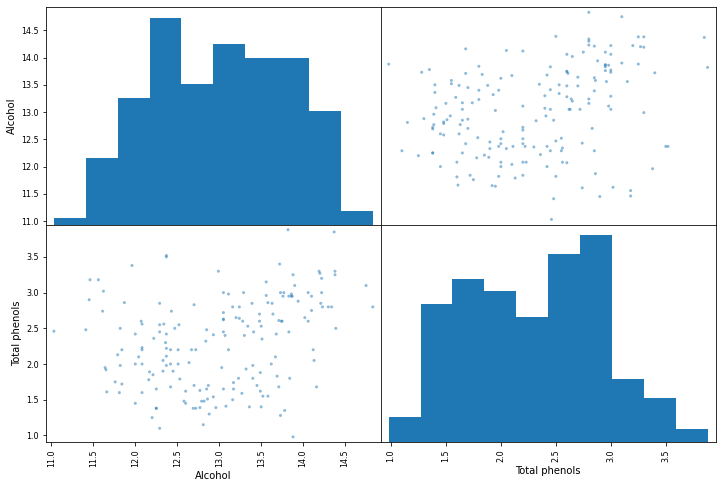

In [23]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(wine_df.iloc[:,[1,6]], figsize=(12,8))
plt.show()

In [25]:
X = wine_df[['Alcohol', 'Total phenols']]

In [26]:
from sklearn.preprocessing import StandardScaler
# instantiate the scaler
scale = StandardScaler()
# compute the mean and std to be used later for scaling
scale.fit(X)
# StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
scale.mean_

array([13.00061798,  2.29511236])

In [28]:
scale.scale_

array([0.80954291, 0.62409056])

In [29]:
X_scaled = scale.transform(X)

In [35]:
X_scaled.mean(axis=0)

array([-8.38280756e-16,  0.00000000e+00])

In [36]:
X_scaled.std(axis=0)

array([1., 1.])

In [37]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)
print(y_pred)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 0 0 2 0 2 0 1 2 1 2
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 2 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2]


In [40]:
kmeans.cluster_centers_

array([[-1.06183503,  0.08414606],
       [ 0.05253603, -1.14020926],
       [ 0.92017418,  0.87087204]])

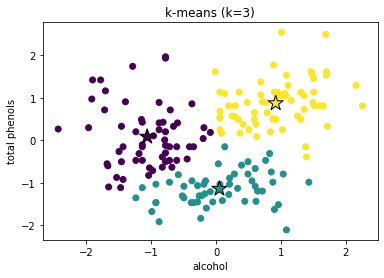

In [41]:
import matplotlib.pyplot as plt
# plot the scaled data
plt.scatter(X_scaled[:,0], 
            X_scaled[:,1],
            c= y_pred)
# identify the centroids
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1], 
            marker="*",
            s = 250, 
            c = [0,1,2], 
            edgecolors='k')
plt.xlabel('alcohol'); plt.ylabel('total phenols')
plt.title('k-means (k=3)')
plt.show()

In [42]:
X_new = np.array([[13, 2.5]])

In [43]:
X_new_scaled = scale.transform(X_new)
print(X_new_scaled)

[[-0.00076337  0.32829793]]


In [45]:
kmeans.predict(X_new_scaled)

array([2], dtype=int32)

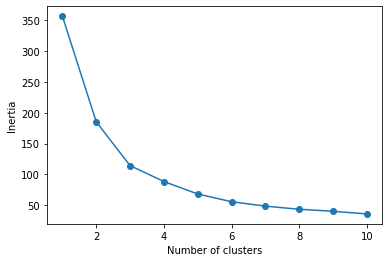

In [46]:
import numpy as np
# calculate distortion for a range of number of cluster
inertia = []
for i in np.arange(1, 11):
    km = KMeans(
        n_clusters=i
    )
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# plot
plt.plot(np.arange(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [47]:
X = wine_df

In [48]:
scale = StandardScaler() 
scale.fit(X)
X_scaled = scale.transform(X)

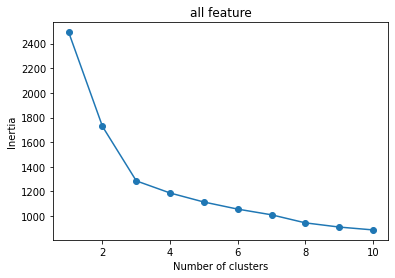

In [49]:
inertia = [] 
for i in np.arange(1, 11):
    km = KMeans(
        n_clusters=i 
        )
    km.fit(X_scaled) 
    inertia.append(km.inertia_)
plt.plot(np.arange(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("all feature")
plt.show()

In [50]:
k_opt = 3
kmenas = KMeans(k_opt)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
